In [0]:
# These code is only for running on Google Colaboratory
# It only aims for import files from Google Drive
# You will be asked for Google Drive authorization
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!ls "/content/drive/My Drive/ITE351/data/cooking"

sample_submission.csv  test.json  train.json


In [0]:
#for manipulating data
import pandas as pd
#for numerical manipulation
import numpy as np
#for splitting dataset
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import gc

Read json file, setting the name df (initial dataframe)

In [0]:
df = pd.read_json('/content/drive/My Drive/ITE351/data/cooking/train.json')
submission_df=pd.read_json('/content/drive/My Drive/ITE351/data/cooking/test.json')

In [0]:
df.head(10)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [0]:
df.shape

(39774, 3)

In [0]:
df.keys()

Index(['cuisine', 'id', 'ingredients'], dtype='object')

In [0]:
df["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [0]:
def get_continent(row):
    map = {'greek':'europe','southern_us':'south_america',
           'filipino':'asia','indian':'asia','jamaican':'north_america',
           'spanish':'europe','italian':'europe','mexican':'north_america',
           'chinese':'asia','british':'europe','thai':'asia',
           'vietnamese':'asia','cajun_creole':'','brazilian':'south_america',
           'french':'europe','japanese':'asia','irish':'europe',
           'korean':'asia','moroccan':'africa','russian':''}
    return map[row["cuisine"]]

In [0]:
df['continent'] = df.apply (lambda row: get_continent(row), axis=1)

In [0]:
df.head(10)

,cuisine,id,ingredients,continent
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",europe
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",south_america
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",asia
3,indian,22213,"[water, vegetable oil, wheat, salt]",asia
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",asia
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",north_america
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",europe
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",europe
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",north_america
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",europe


In [0]:
ingredients = df['ingredients'].iloc[0]
ingredients

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [0]:
type(ingredients)

list

In [0]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

Data visualization 

See the amount of each cuisine 

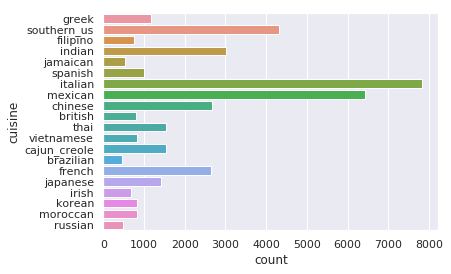

In [0]:
import seaborn as sns; sns.set()
sns.countplot(y=df['cuisine'], data=df)
#df['cuisine'].value_counts().plot(kind='bar')

Sepate each ingredients row using ; instead of " "

In [0]:
df['all_ingredients'] = df['ingredients'].map(";".join)

In [0]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests

put all the ingredients into one list to see the most common one

In [0]:
ing = " ".join(k for k in df['all_ingredients'])

In [0]:
wordcloud = WordCloud().generate(ing)

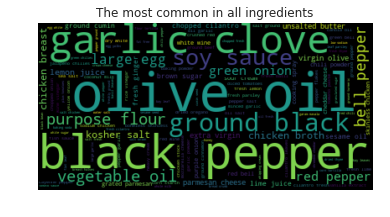

In [0]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most common in all ingredients")
plt.axis("off")
plt.show()

As we can see the most common in all cuisine are: garlic clove, olive oil, black peper

In [0]:
groupdf = df.sort_values(['continent','all_ingredients']).groupby('continent',sort=False)\
['all_ingredients'].apply(''.join).reset_index(name='group_ingredients')
groupdf

,continent,group_ingredients
0,,Alfredo sauce;shrimp;tilapia filletsBACARDI® M...
1,africa,Italian parsley leaves;fresh mint;ground black...
2,asia,( oz.) tomato sauce;serrano chilies;golden ...
3,europe,( oz.) tomato sauce;ground veal;sliced mush...
4,north_america,( oz.) tomato sauce;diced tomatoes;chopped ...
5,south_america,1% low-fat buttermilk;large eggs;yellow corn m...


In [0]:
text = groupdf['group_ingredients'][2]

0 = unknown, 1=africa, 2=asia, 3 =europe, 4 = north_america, 5 =south_america

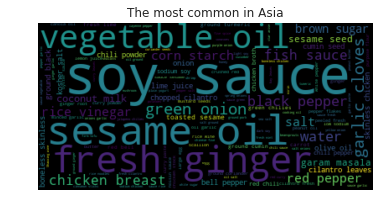

In [0]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most common in Asia")
plt.axis("off")
plt.show()


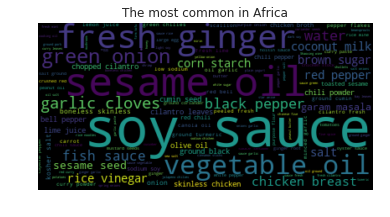

In [0]:
text1 = groupdf['group_ingredients'][1]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most common in Africa")
plt.axis("off")
plt.show()


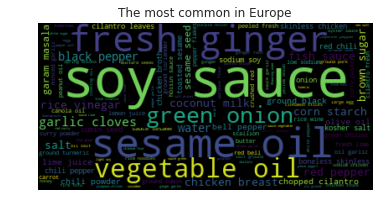

In [0]:
text2 = groupdf['group_ingredients'][3]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most common in Europe")
plt.axis("off")
plt.show()


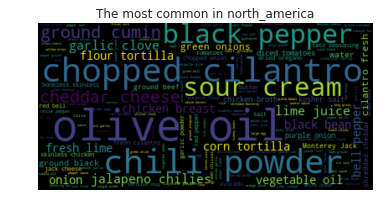

In [0]:
text = groupdf['group_ingredients'][4]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most common in north_america")
plt.axis("off")
plt.show()


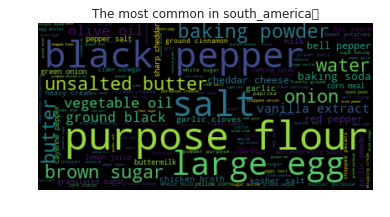

In [0]:
text = groupdf['group_ingredients'][5]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most common in south_america	")
plt.axis("off")
plt.show()


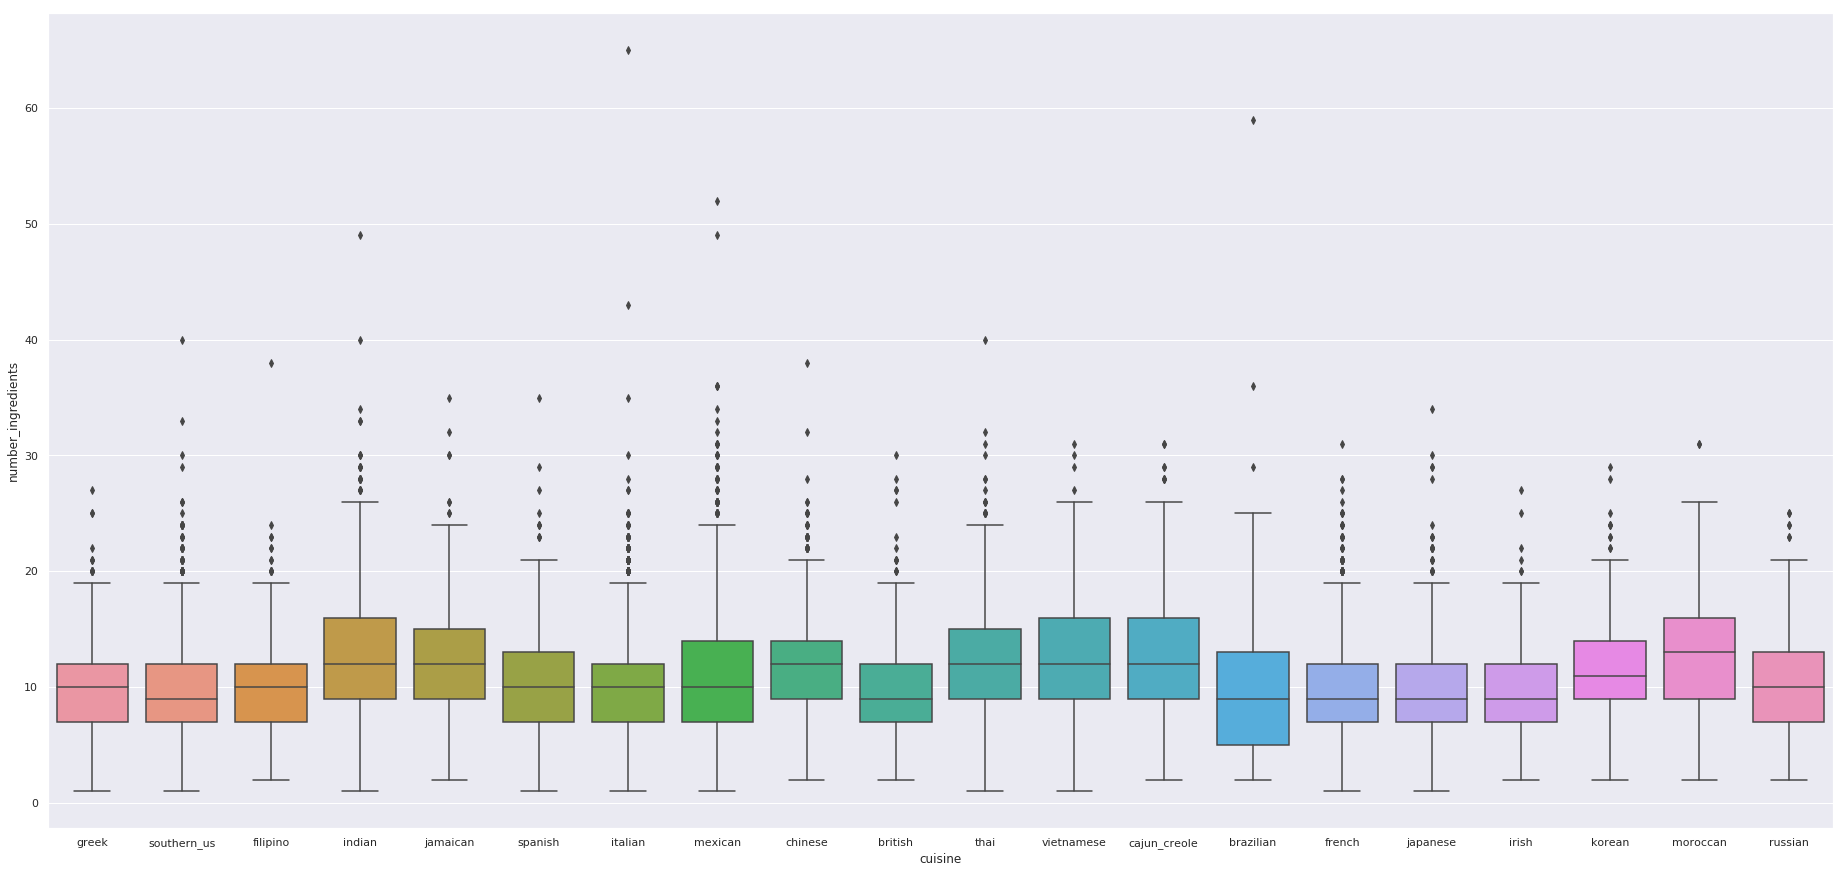

In [0]:
f, ax = plt.subplots(figsize=(32,15))
sns.boxplot(x='cuisine',
            y='number_ingredients',
            data= (pd.concat([df.cuisine,df.ingredients.map(lambda l: len(l))], axis=1)
                    .rename(columns={'ingredients':'number_ingredients'}))
            )

Count the frequenct ingredient used in each cuisine (here using df, initial dataframe)

In [0]:
from collections import Counter
counters = {}
for cuisine in df['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df['cuisine'] == cuisine)
    for ingredients in df[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [0]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [0]:
counters['mexican'].most_common(10)


In [0]:
counters['italian'].most_common(10)

In [0]:
counters['chinese'].most_common(10)

Classification

In [0]:
df.head(10)

In [0]:
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# train, test = train_test_split(df, test_size=0.3)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.all_ingredients)

model = MultinomialNB()

cv = cross_val_score(model, X, df.cuisine, cv=5)

In [0]:
print(cv)

[0.66942979 0.67780849 0.66201609 0.67123632 0.67371335]


In [0]:
le=LabelEncoder()
label=le.fit_transform(df.cuisine)
label.shape

(39774,)

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predict = cross_val_predict(model, X, label, cv=5)

predict_label_nb = le.inverse_transform(predict)
true_label_nb = le.inverse_transform(label)

In [0]:
conf_mat = confusion_matrix(true_label_nb, predict_label_nb)

Text(73.7, 0.5, 'True')

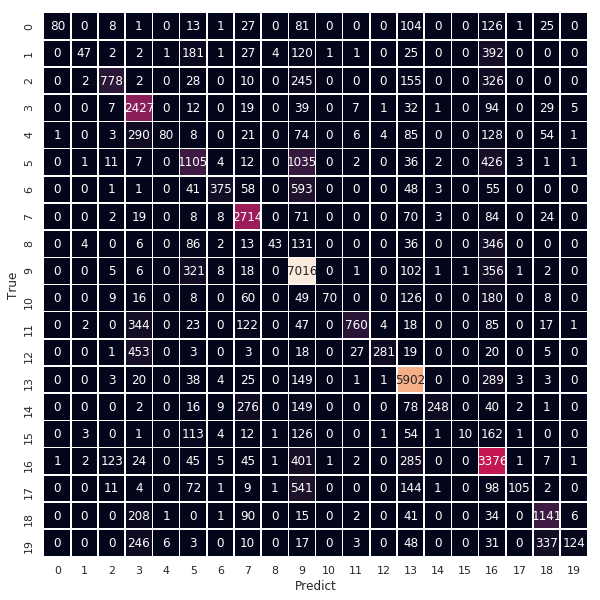

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) # Sample figsize in inches
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, ax=ax)
plt.xlabel('Predict')
plt.ylabel('True')

In [0]:
tfidf.get_feature_names()

['00',
 '10',
 '100',
 '14',
 '15',
 '25',
 '33',
 '40',
 '43',
 '95',
 '96',
 'abalone',
 'abbamele',
 'absinthe',
 'abura',
 'acai',
 'accent',
 'accompaniment',
 'achiote',
 'acid',
 'acini',
 'ackee',
 'acorn',
 'acting',
 'activ',
 'active',
 'added',
 'adobo',
 'adzuki',
 'agar',
 'agave',
 'age',
 'aged',
 'ahi',
 'aioli',
 'ajinomoto',
 'ajwain',
 'aka',
 'alaskan',
 'albacore',
 'alcohol',
 'ale',
 'aleppo',
 'alexia',
 'alfalfa',
 'alfredo',
 'all',
 'allspice',
 'almond',
 'almondmilk',
 'almonds',
 'aloe',
 'alphabet',
 'alum',
 'amaranth',
 'amarena',
 'amaretti',
 'amaretto',
 'amba',
 'amber',
 'amberjack',
 'amchur',
 'america',
 'american',
 'aminos',
 'ammonium',
 'amontillado',
 'ampalaya',
 'an',
 'anaheim',
 'anasazi',
 'ancho',
 'anchovies',
 'anchovy',
 'and',
 'andouille',
 'anejo',
 'angel',
 'anglaise',
 'angled',
 'angostura',
 'angus',
 'anise',
 'anisette',
 'anjou',
 'annatto',
 'any',
 'aonori',
 'apple',
 'apples',
 'applesauce',
 'applewood',
 'apricot'

In [0]:
len(tfidf.get_feature_names())

3010

In [0]:
df['ingredients_remap'] = df['all_ingredients'].map(lambda x: x.replace(' ','_').replace(';',' '))

Multinomial Naive Bayes

In [0]:
df.head(10)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
X1 = cvec.fit_transform(df.ingredients_remap)
cv1 = cross_val_score(model, X1, df.cuisine, cv=5)
model.fit(X1,df.cuisine)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
print(cv1)

[0.7244411  0.73322443 0.72486174 0.73185763 0.73436517]


In [0]:
len(cvec.get_feature_names())

6867

Text(73.7, 0.5, 'True')

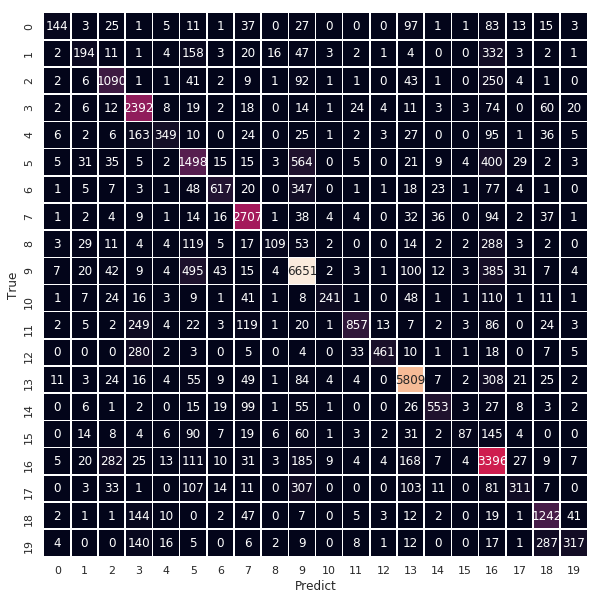

In [0]:
predict1 = cross_val_predict(model, X1, df.cuisine, cv=5)
conf_mat1 = confusion_matrix(df.cuisine, predict1)

fig, ax = plt.subplots(figsize=(10,10)) # Sample figsize in inches
sns.heatmap(conf_mat1, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, ax=ax)
plt.xlabel('Predict')
plt.ylabel('True')

In [0]:
train, test = train_test_split(df, test_size=0.3)

In [0]:
model_count_vec = make_pipeline(CountVectorizer(), MultinomialNB())

In [0]:
model_count_vec.fit(train.ingredients_remap,train.cuisine)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
count_vec_predict = model_count_vec.predict(test.ingredients_remap)

In [0]:
print(test.cuisine[:20])
print(count_vec_predict[:20])

22237          korean
22364     southern_us
27971          indian
34654    cajun_creole
2108          italian
27096         mexican
150           italian
29597         mexican
25212    cajun_creole
22901         italian
32660          french
32128       brazilian
32137         mexican
1162             thai
14291         italian
39336            thai
7217          british
28168    cajun_creole
27416         mexican
20029         italian
Name: cuisine, dtype: object
['korean' 'southern_us' 'indian' 'southern_us' 'italian' 'mexican'
 'italian' 'italian' 'cajun_creole' 'italian' 'french' 'brazilian'
 'mexican' 'thai' 'italian' 'thai' 'british' 'mexican' 'mexican' 'italian']


In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC
#rand_for_model = RandomForestClassifier(n_estimators=1000)


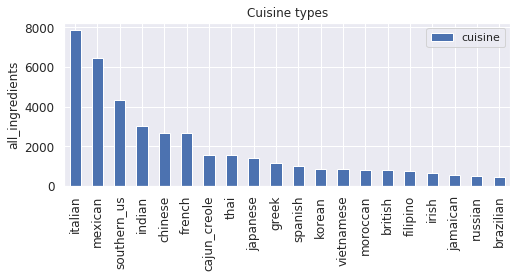

In [0]:
ax = df['cuisine'].value_counts().plot(kind='bar', title="Cuisine types", figsize=(8,3), legend=True, fontsize=12)
ax.set_ylabel("all_ingredients")
plt.show()

In [0]:
#divide the original train data into 3 sets: 
#test_df contain 30% recipes for each cuisine type
#df contain 70% recipes for each cuisine type
#cut_df will contain the remaining data

new_test_df=pd.DataFrame()
new_df=pd.DataFrame()
cut_df=pd.DataFrame()
cut_percentage=0.01  
for cuisine in df['cuisine'].drop_duplicates().values :
    temp=pd.DataFrame()
    temp=df[df['cuisine']==cuisine]
    rows_test = random.sample(list(temp.index), round(0.3*(1-cut_percentage)*len(df[df['cuisine']==cuisine])))
    new_test_df=new_test_df.append(temp.ix[rows_test])
    rows_train= random.sample(list(temp.drop(rows_test).index), round(0.7*(1-cut_percentage)*len(df[df['cuisine']==cuisine])))
    new_df=new_df.append(temp.ix[rows_train])
    rows=rows_test+rows_train
    cut_df=cut_df.append(temp.drop(rows))
    del temp

ax=plt.subplot()
CuisineCall = list(range(0,len(cut_df['cuisine'].value_counts().index)))
LABELS=cut_df['cuisine'].value_counts().index
ax.bar(CuisineCall,cut_df['cuisine'].value_counts(),width=0.5,color='r',align='center',label='cut data')
ax.bar(CuisineCall,new_df['cuisine'].value_counts(),width=0.5,color='b',align='center', label='new train data')
ax.bar(CuisineCall,new_test_df['cuisine'].value_counts(),width=0.5,color='g',align='center',label='new test data')
plt.xticks(CuisineCall, LABELS,rotation=85)
ax.autoscale(tight=True)
plt.legend()

plt.show()

In [0]:
try: 
    del df
except:pass;gc.collect()

# Get the ingredients column from the new train data and create the list of all existing ingredients
new_ingredients=new_df.ingredients
rawlist=[item for sublist in new_ingredients.ravel() for item in sublist] #convert the ingredients list of lists into a list
ingredients=list(set(rawlist)) #remove duplicates

for ing in ingredients:
    vector=[]
    # loop for train data
    for recipe in new_df.ingredients: 
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    new_df[ing]=pd.Series(vector,index=new_df.index) # Adds column containing 0 and 1's for this ingredient
    
    # loop for test data
    vector=[]
    for recipe in new_test_df.ingredients:
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    new_test_df[ing]=pd.Series(vector,index=new_test_df.index) # Adds column containing 0 and 1's for this ingredient
   
    # loop for cut data
    vector=[]
    for recipe in cut_df.ingredients:
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    cut_df[ing]=pd.Series(vector,index=cut_df.index) # Adds column containing 0 and 1's for this ingredient

    # While we are here, let's build also the submission data
    vector=[]
    for recipe in submission_df.ingredients:
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    submission_df[ing]=pd.Series(vector,index=submission_df.index) # Adds column containing 0 and 1's for this ingredient

# useless columns removal
new_df=new_df.drop('ingredients',1)
new_df=new_df.drop('id',1)

new_test_df=new_test_df.drop('ingredients',1)
new_test_df=new_test_df.drop('id',1)

cut_df=cut_df.drop('ingredients',1)
cut_df=cut_df.drop('id',1)

submission_df=submission_df.drop('ingredients',1)

new_df.head()

In [0]:
try: 
    X_train=new_df.drop('cuisine',axis=1)
    Y_train=new_df['cuisine']
    X_test=new_test_df.drop('cuisine',axis=1)
    Y_test=new_test_df['cuisine']
    X_cut=cut_df.drop('cuisine',axis=1)
    Y_cut=cut_df['cuisine']
    del new_df
    del new_test_df
    del new_ingredients
    del rawlist
    del ingredients
    del vector
except:pass;gc.collect()

In [0]:
from sklearn import metrics
forest=RFC(n_estimators=10,max_features=10)
forest.fit(X_train,Y_train)
output=forest.predict(X_test)
metrics.accuracy_score(Y_test, output)

In [0]:
opt_table_estimators=list()
n_features=5
n_estimators=50
for i in range(1,n_estimators):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,Y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(Y_test, output))
plt.plot(range(1,n_estimators), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

The following code is to check for the number of trees. Its plotting the fitting score vs the number of estimators for a given number of maximum features
n_features= 5 to reduce computation time

From the graph, the number of trees is very important until 20 then the slope gets weaker

In [0]:
opt_table_n_features=list()
n_estimators=5
n_features=50
for i in range(1,n_features):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,Y_train)
    output=forest.predict(X_test)
    opt_table_n_features.append(metrics.accuracy_score(Y_test, output))
plt.plot(range(1,n_features), opt_table_n_features)
plt.xlabel('Number of features')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of features (5 trees)')
plt.show()

The following code is to get the number of features.

From the graph, the importance of the number of features has a little less effect on the prediction than the number of trees.

In [0]:
forest=RFC(n_estimators=40,max_features=10)
forest.fit(X_train,Y_train)
output=forest.predict(X_test)
metrics.accuracy_score(Y_test, output)

In [0]:
forest=RFC(n_estimators=50,max_features=10)
forest.fit(X_train,Y_train)
output=forest.predict(X_test)
metrics.accuracy_score(Y_test, output)

In [0]:
importance = forest.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_plot=importance.sort_values('Importance',ascending=False ).loc[importance['Importance']>0.004,:]
x = np.arange(len(importance_plot.index.values))
y = importance_plot.ix[:, 0]
plt.bar(x, y,align='center')
plt.xticks(x,importance_plot.index.values,rotation=85)
plt.ylabel('Importance')
plt.title('Main ingredients importance')
plt.autoscale(tight=True)
plt.show()

XGBoost

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection  import GridSearchCV
xgb_model = XGBClassifier()

In [0]:
X_xgb_train = cvec.fit_transform(df.ingredients_remap)
print(X_xgb_train.shape)

(39774, 6867)


In [0]:
x_xgb_train, x_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb_train,
                                                    label,
                                                    test_size=0.3)


In [0]:
xgb_parameters = {
              'learning_rate': [0.6],
              'max_depth': [4,6],
              'min_child_weight': [2,3],
              'silent': [1],
              'subsample': [0.8,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [100],
              'missing':[-999],
              'seed': [1234]}

xgb_clf = GridSearchCV(xgb_model, 
                       xgb_parameters, 
                       n_jobs=8,
                       cv=5,
                       verbose=2,
                       refit=True)


In [0]:
xgb_clf.fit(x_xgb_train, y_xgb_train)
xgb_best_est = xgb_clf.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 15.5min
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed: 23.1min finished


In [0]:
print(xgb_best_est)

In [0]:
xgb_best_est.score(x_xgb_train,y_xgb_train)

In [0]:
xgb_best_est.score(x_xgb_test,y_xgb_test)

**LightGBM**

In [0]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    is_unbalance=True, 
    random_state=1234, 
    n_estimators=100,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15,
    learning_rate=0.6)
X_lgbm_train = cvec.fit_transform(df.ingredients_remap).astype('float')
print(X_lgbm_train.shape)


In [0]:
x_lgbm_train, x_lgbm_test, y_lgbm_train, y_lgbm_test = train_test_split(X_lgbm_train,
                                                    label,
                                                    test_size=0.3)

In [0]:
lgbm_parameters = {'learning_rate': [0.01,0.1,0.3],
              'num_leaves': [30,35],
              'max_depth': [2,4],
              'min_child_weight': [3],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.5]
}


lgbm_clf = GridSearchCV(lgbm_model, 
                   lgbm_parameters, 
                   n_jobs=8,
                   cv=5,
                   verbose=2)


In [0]:
lgbm_clf.fit(x_lgbm_train, y_lgbm_train)
lgbm_best_est = lgbm_clf.best_estimator_

In [0]:
lgbm_best_est.score(x_lgbm_train,y_lgbm_train)

In [0]:
lgbm_best_est.score(x_lgbm_test,y_lgbm_test)